In [113]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
import statsmodels.formula.api as smf
import pylab
import statsmodels.api as sm

warnings.filterwarnings('ignore')

## 1-Import and clean the dataset

### Import the dataset

In [114]:
## Notice the root we have set; be sure to change to make the python work.
Stock=pd.read_csv('/Users/lihuayu/Documents/UMich-New Start/Extra Help/Christ/Christmas_proj/data2.csv')

### Separate the dataset into several pieces

In [115]:
StockA=Stock[Stock['symbol']=='STOCKA']
StockB=Stock[Stock['symbol']=='STOCKB']

In [116]:
## Note that the length of Stock_A dataset is 224802, and for Stock_B, that is 225632
Stock_A=StockA[StockA['bid']!=0]
Stock_B=StockB[StockB['bid']!=0]
trade_A=StockA[StockA['bid']==0]
trade_B=StockB[StockB['bid']==0]
#plt.plot((Stock_A['time']-min(Stock_A['time']))[0:100000],Stock_A['ask'][0:100000],'r--')

Here we will consider regression model to predict the stock price. Because the price may relate to  previous record, so here we will paste the former three records into the dataset.

In [117]:
### To begin with, we delete the duplicate records to compress the data
ST_A=Stock_A.drop_duplicates(['bid','bidsz','ask','asksz'],'first',inplace=False)
ST_A=ST_A[['time','bid','bidsz','ask','asksz']]
ST_A=ST_A.reset_index(drop=True)

ST_B=Stock_B.drop_duplicates(['bid','bidsz','ask','asksz'],'first',inplace=False)
ST_B=ST_B[['time','bid','bidsz','ask','asksz']]
ST_B=ST_B.reset_index(drop=True)

In [118]:
#### For ST_A, here we put the stock data and the three previous records
#### into one line; if the record does not exist, using the initial data to replace.
paste_A1=ST_A[0:-1][['bid','bidsz','ask','asksz']]
paste_A2=ST_A[0:-2][['bid','bidsz','ask','asksz']]
paste_A3=ST_A[0:-3][['bid','bidsz','ask','asksz']]

paste_A1.columns=['bid1','bidsz1','ask1','asksz1']
paste_A2.columns=['bid2','bidsz2','ask2','asksz2']
paste_A3.columns=['bid3','bidsz3','ask3','asksz3']

paste_A1.reset_index(drop=True)
paste_A2.reset_index(drop=True)
paste_A3.reset_index(drop=True)

T01=paste_A1[0:1]
A1=T01.append(paste_A1,ignore_index=True)

T02=paste_A2[0:1]
A2=T02.append(T02,ignore_index=True)
A2=A2.append(paste_A2,ignore_index=True)

T03=paste_A3[0:1]
A3=T03.append(T03,ignore_index=True)
A3=A3.append(T03,ignore_index=True)
A3=A3.append(paste_A3,ignore_index=True)

Fin_A=pd.concat([ST_A,A1,A2,A3],axis=1)

## Here we set the unit of time as seconds, and use the initial 
## condition as the time standard, set this standard time as 0.
Fin_A['time']=(Fin_A['time']-min(Fin_A['time']))/pow(10,6)

In [119]:
A1

bid1  bidsz1  ask1  asksz1
0      4006       1  4174      10
1      4006       1  4174      10
2      4006       1  4175       1
3      4138      15  4175       1
4      4138      15  4164      15
5      4138      15  4163      11
6      4147       1  4163      11
7      4147       1  4157      15
8      4147       1  4157      16
9      4138      15  4157      16
10     4146       1  4157      16
11     4146       1  4157      15
12     4138      15  4157      15
13     4138      15  4156      15
14     4138      15  4156      16
15     4145       1  4156      16
16     4145       1  4156      15
17     4151       1  4156      15
18     4151       1  4153      15
19     4151       1  4153      16
20     4145       1  4153      16
21     4138      15  4153      16
22     4138      15  4152      15
23     4138      15  4152      16
24     4147       1  4152      16
25     4146       1  4152      15
26     4146       1  4152       7
27     4151       1  4152       7
28     4146       1  4152       6
29     4151       1  4152       6
...     ...     ...   ...     ...
64792  4149      36  4150      96
64793  4149      36  4150      94
64794  4149      38  4150      94
64795  4149      44  4150      94
64796  4149      45  4150      94
64797  4149      50  4150      94
64798  4149      47  4150      94
64799  4149      39  4150      94
64800  4149      37  4150      94
64801  4149      42  4150      94
64802  4149      43  4150      94
64803  4149      41  4150      94
64804  4149      51  4150      94
64805  4149      49  4150      94
64806  4149      46  4150      94
64807  4149      48  4150      94
64808  4149      53  4150      94
64809  4149      55  4150      94
64810  4149      55  4150     104
64811  4149      55  4150     114
64812  4149      54  4150     114
64813  4149      59  4150     114
64814  4149      58  4150     114
64815  4149      56  4150     112
64816  4149      56  4150     111
64817  4149      56  4150     106
64818  4149      52  4150     106
64819  4149      52  4150     104
64820  4149      49  4150     104
64821  4149      49  4150     103

[64822 rows x 4 columns]

In [120]:
#### For ST_B, here we put the stock data and the three previous records
#### into one line; if the record does not exist, using the initial data to replace.
paste_B1=ST_B[0:-1][['bid','bidsz','ask','asksz']]
paste_B2=ST_B[0:-2][['bid','bidsz','ask','asksz']]
paste_B3=ST_B[0:-3][['bid','bidsz','ask','asksz']]

paste_B1.columns=['bid1','bidsz1','ask1','asksz1']
paste_B2.columns=['bid2','bidsz2','ask2','asksz2']
paste_B3.columns=['bid3','bidsz3','ask3','asksz3']

paste_B1.reset_index(drop=True)
paste_B2.reset_index(drop=True)
paste_B3.reset_index(drop=True)

T01=paste_B1[0:1]
B1=T01.append(paste_B1,ignore_index=True)

T02=paste_B2[0:1]
B2=T02.append(T02,ignore_index=True)
B2=B2.append(paste_B2,ignore_index=True)

T03=paste_B3[0:1]
B3=T03.append(T03,ignore_index=True)
B3=B3.append(T03,ignore_index=True)
B3=B3.append(paste_B3,ignore_index=True)

Fin_B=pd.concat([ST_B,B1,B2,B3],axis=1)

## Here we set the unit of time as seconds, and use the initial 
## condition as the time standard, set this standard time as 0.
Fin_B['time']=(Fin_B['time']-min(Fin_B['time']))/pow(10,6)

In [121]:
#### Here we separate the dataset into training and testing datasets 
#### (in the proportion 9:1). Besides, we produce some datasets with
#### parameters '.sz' replaced by the log values. 
train_A=Fin_A[0:int(0.9*len(Fin_A))]
test_A=Fin_A[int(0.9*len(Fin_A)):len(Fin_A)]
train_B=Fin_B[0:int(0.9*len(Fin_B))]
test_B=Fin_B[int(0.9*len(Fin_B)):len(Fin_B)]

l_trainA=Fin_A[0:int(0.9*len(Fin_A))]
l_trainA['bidsz']=np.log(l_trainA['bidsz'])
l_trainA['asksz']=np.log(l_trainA['asksz'])
l_trainB=Fin_B[0:int(0.9*len(Fin_B))]
l_trainB['bidsz']=np.log(l_trainB['bidsz'])
l_trainB['asksz']=np.log(l_trainB['asksz'])

l_testA=Fin_A[int(0.9*len(Fin_A)):len(Fin_A)]
l_testA['bidsz']=np.log(l_testA['bidsz'])
l_testA['asksz']=np.log(l_testA['asksz'])
l_testB=Fin_B[int(0.9*len(Fin_B)):len(Fin_B)]
l_testB['bidsz']=np.log(l_testB['bidsz'])
l_testB['asksz']=np.log(l_testB['asksz'])

## 2-Model Constructions

### Part 1: Prediction of the stock price when disregarding the time of change

Note that the target of the models are prediction, so here we will only fit upon the training dataset; and then we will use the methods upon the testing dataset. Here we will use MSE as our comparison criterion. 

#### Model 1: Linear Regression using OLS

In [122]:
y_A_bid=train_A['bid']
y_A_ask=train_A['ask']
x_A=train_A[['time','bid1','bidsz1','ask1','asksz1',
                    'bid2','bidsz2','ask2','asksz2',
                    'bid3','bidsz3','ask3','asksz3']]

ols_A_bid=linear_model.LinearRegression()
ols_A_ask=linear_model.LinearRegression()
ols_A_bid.fit(x_A,y_A_bid)
ols_A_ask.fit(x_A,y_A_ask)

y_B_bid=train_B['bid']
y_B_ask=train_B['ask']
x_B=train_B[['time','bid1','bidsz1','ask1','asksz1',
                    'bid2','bidsz2','ask2','asksz2',
                    'bid3','bidsz3','ask3','asksz3']]

ols_B_bid=linear_model.LinearRegression()
ols_B_ask=linear_model.LinearRegression()
ols_B_bid.fit(x_B,y_B_bid)
ols_B_ask.fit(x_B,y_B_ask)
## Here we only produce the models, and for the validation, this will be done later.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
ols_A_bid.intercept_

26.430627976305004

In [124]:
ols_A_bid.coef_

array([ 5.35571486e-06,  9.20847909e-01,  2.12622260e-04,  4.25396506e-02,
       -5.02070653e-04,  8.76223822e-03,  1.98899989e-04, -2.49055921e-02,
        5.36145520e-04,  5.51415576e-03,  2.83020915e-04,  4.08298329e-02,
       -6.83062027e-05])

#### Model 2: Stepwise selection upon OLS method

Here we will only use the Backward Selection to select the predictors. The following code is from the github link https://github.com/talhahascelik/python_stepwiseSelection/blob/master/stepwiseSelection.py, which is used for stepwise selection.

In [125]:
#Copyright 2019 Sinan Talha Hascelik
#
#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.


def forwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    
    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    
    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    
    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    
    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    
    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    
    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols, iterations_log

Using the function, we fit the models using backward selection; after selected, we then fit the new models using the selected variables

In [126]:
backwardSelection(x_A,y_A_bid,model_type='linear',elimination_criteria='aic');

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : asksz3
Eliminated : bidsz2
Eliminated : bidsz1
Eliminated : asksz2
Regained :  asksz2
                            OLS Regression Results                            
Dep. Variable:                    bid   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.420e+05
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:20:01   Log-Likelihood:                -51044.
No. Observations:               58339   AIC:                         1.021e+05
Df Residuals:                   58328   BIC:                         1.022e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

In [127]:
## For each responsors, after calculated using backward selection, 
## using the selected predictors to construct the new regression models.
ss_A_bid=linear_model.LinearRegression()
ss_A_bid.fit(x_A[['time','bid1',
         'bidsz1','ask1','asksz1','bid2',
         'bidsz2','ask2','bid3','asksz3']].astype(float),y_A_bid.astype(float))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
backwardSelection(x_A,y_A_ask,model_type='linear',elimination_criteria='aic');

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : bidsz3
Eliminated : asksz2
Eliminated : ask3
                            OLS Regression Results                            
Dep. Variable:                    ask   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.862e+06
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:20:01   Log-Likelihood:                -10578.
No. Observations:               58339   AIC:                         2.118e+04
Df Residuals:                   58328   BIC:                         2.128e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [129]:
ss_A_ask=linear_model.LinearRegression()
ss_A_ask.fit(x_A[['time','bid1',
         'bidsz1','ask1','asksz1','bid2',
         'bidsz2','ask2','bid3','asksz3']].astype(float),y_A_bid.astype(float))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
backwardSelection(x_B,y_B_bid,model_type='linear',elimination_criteria='aic');

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : asksz1
Eliminated : asksz2
Eliminated : asksz3
Eliminated : ask3
Eliminated : bidsz2
Regained :  bidsz2
                            OLS Regression Results                            
Dep. Variable:                    bid   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.670e+05
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:20:02   Log-Likelihood:                -18450.
No. Observations:               18765   AIC:                         3.692e+04
Df Residuals:                   18755   BIC:                         3.700e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    s

In [131]:
ss_B_bid=linear_model.LinearRegression()
ss_B_bid.fit(x_B[['time','bid1',
         'bidsz1','ask1','bid2',
         'bidsz2','ask2','bid3','asksz3']].astype(float),y_B_bid.astype(float))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
backwardSelection(x_B,y_B_ask,model_type='linear',elimination_criteria='aic');

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : bid2
Eliminated : bidsz1
Eliminated : asksz3
Regained :  asksz3
                            OLS Regression Results                            
Dep. Variable:                    ask   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.597e+05
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:20:04   Log-Likelihood:                -16102.
No. Observations:               18765   AIC:                         3.223e+04
Df Residuals:                   18753   BIC:                         3.232e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

In [133]:
ss_B_ask=linear_model.LinearRegression()
ss_B_ask.fit(x_B[['time','bid1',
         'ask1','asksz1','bidsz2','ask2','asksz2',
         'bid3','bidsz3','ask3','asksz3']].astype(float),y_B_bid.astype(float))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model 3: Elastic Net

In [134]:
### Here we consider the elastic net model, for the model is for prediction, and 
### we have to do some model selection.
### We directly use the ElasticNet method in sklearn.linear_model
Alpha=np.logspace(-5,1,100)
elastic_A_bid=linear_model.ElasticNet(l1_ratio=0.7)
elastic_A_ask=linear_model.ElasticNet(l1_ratio=0.7)
elastic_B_bid=linear_model.ElasticNet(l1_ratio=0.7)
elastic_B_ask=linear_model.ElasticNet(l1_ratio=0.7)
A_bid_train_errors=list()
A_ask_train_errors=list()
B_bid_train_errors=list()
B_ask_train_errors=list()

for alpha in Alpha:
    elastic_A_bid.set_params(alpha=alpha)
    elastic_A_ask.set_params(alpha=alpha)
    elastic_B_bid.set_params(alpha=alpha)
    elastic_B_ask.set_params(alpha=alpha)    
    
    elastic_A_bid.fit(train_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_A['bid'])
    elastic_A_ask.fit(train_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_A['ask'])    
    elastic_B_bid.fit(train_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_B['bid'])
    elastic_B_ask.fit(train_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_B['ask'])        
 
    A_bid_train_errors.append(elastic_A_bid.score(test_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_A['bid']))
    A_ask_train_errors.append(elastic_A_ask.score(test_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_A['ask']))
    B_bid_train_errors.append(elastic_B_bid.score(test_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_B['bid']))

    B_ask_train_errors.append(elastic_B_ask.score(test_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_B['ask']))    

Here because the testing datasets are assumed to be unknown, so here we will only choose the model with the least errors upon training dataset.

In [135]:
### The regression coefficients
elastic_A_bid.set_params(alpha=Alpha[np.argmax(A_bid_train_errors)])
coef_A_bid=elastic_A_bid.fit(train_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_A['bid']).coef_
intc_A_bid=elastic_A_bid.fit(train_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_A['bid']).intercept_
A_bid_test_errors=elastic_A_bid.score(test_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_A['bid'])

elastic_A_ask.set_params(alpha=Alpha[np.argmax(A_ask_train_errors)])
coef_A_ask=elastic_A_ask.fit(train_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                           'bid3','bidsz3','ask3','asksz3']],train_A['ask']).coef_           
intc_A_ask=elastic_A_ask.fit(train_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_A['ask']).intercept_
A_ask_test_errors=elastic_A_ask.score(test_A[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_A['ask'])

elastic_B_bid.set_params(alpha=Alpha[np.argmax(B_bid_train_errors)])
coef_B_bid=elastic_B_bid.fit(train_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_B['bid']).coef_
intc_B_bid=elastic_B_bid.fit(train_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_B['bid']).intercept_                                      
B_bid_test_errors=elastic_B_bid.score(test_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_B['bid'])

elastic_B_ask.set_params(alpha=Alpha[np.argmax(B_ask_train_errors)])
coef_B_ask=elastic_B_ask.fit(train_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_B['ask']).coef_
intc_B_ask=elastic_B_ask.fit(train_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_B['ask']).intercept_                                     
B_ask_test_errors=elastic_B_ask.score(test_B[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_B['ask']) 

#### Comparison of the four models using the score method in linear_model

In [136]:
test_A_bid=test_A['bid']
test_A_ask=test_A['ask']
test_B_bid=test_B['bid']
test_B_ask=test_B['ask']

test_XA=test_A[['time','bid1','bidsz1','ask1','asksz1',
                      'bid2','bidsz2','ask2','asksz2',
                      'bid3','bidsz3','ask3','asksz3']]
test_XB=test_B[['time','bid1','bidsz1','ask1','asksz1',
                      'bid2','bidsz2','ask2','asksz2',
                      'bid3','bidsz3','ask3','asksz3']]

##### For `bid` in Stock A:

In [137]:
ols_score_bid=ols_A_bid.score(test_XA,test_A_bid)
ss_score_bid=ss_A_bid.score(test_XA[['time','bid1',
         'bidsz1','ask1','asksz1','bid2',
         'bidsz2','ask2','bid3','asksz3']],test_A_bid)
ela_score_bid=A_bid_test_errors
T=[ols_score_bid,ss_score_bid,ela_score_bid]
T

[0.9976620837671039, 0.9976837549744517, 0.9976606438954244]

From the result, the three methods are similar, and the Backward Selection model performs the best. The model is as following: (Here we list the coefficients into a table)

In [138]:
predictor=['Intercept','time','bid1',
         'bidsz1','ask1','asksz1','bid2',
         'bidsz2','ask2','bid3','asksz3']
Coef=np.hstack((np.array(ss_A_bid.intercept_),ss_A_bid.coef_))
DT_Abid=pd.DataFrame([predictor,Coef])
DT_Abid

0            1         2            3          4            5   \
0  Intercept         time      bid1       bidsz1       ask1       asksz1   
1    26.5246  5.36808e-06  0.920987  0.000207072  0.0414963 -0.000419963   

           6            7          8           9            10  
0        bid2       bidsz2       ask2        bid3       asksz3  
1  0.00911806  0.000473692  0.0167763  0.00518838  0.000390145

Here we note that $bid_x$ means the bid value of the previous $x_{th}$ record; and the actually time for Stock A is $(time-1800100887)\times 10^{-6}$ (to transform into seconds).

For Stock B, the time value is $(time-1800019613)\times 10^{-6}$

##### For `ask` in Stock A:

In [353]:
ols_score_ask=ols_A_ask.score(test_XA,test_A_ask)
ss_score_ask=ss_A_ask.score(test_XA[['time','bid1',
         'bidsz1','ask1','asksz1','bid2',
         'bidsz2','ask2','bid3','asksz3']],test_A_ask)
ela_score_ask=A_ask_test_errors
T=[ols_score_ask,ss_score_ask,ela_score_ask]
T

[0.9988693418155155, 0.8190989590475375, 0.9988978771908976]

From the result, the Elastic Net model performs the best. The model is as following: (Here we list the coefficients into a table)

In [354]:
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_A_ask),coef_A_ask))
DT_Abid=pd.DataFrame([predictor,Coef])
DT_Abid

0           1     2       3         4       5           6       7   \
0  Intercept        time  bid1  bidsz1      ask1  asksz1        bid2  bidsz2   
1     7.4791  1.4586e-06     0      -0  0.902697      -0  0.00779197      -0   

          8            9           10      11           12      13  
0       ask2       asksz2        bid3  bidsz3         ask3  asksz3  
1  0.0826555 -0.000572804  0.00422639      -0  0.000831963      -0

##### For `bid` in Stock B:

In [355]:
ols_score_bid=ols_B_bid.score(test_XB,test_B_bid)
ss_score_bid=ss_B_bid.score(test_XB[['time','bid1',
         'bidsz1','ask1','bid2',
         'bidsz2','ask2','bid3','asksz3']],test_B_bid)
ela_score_bid=B_bid_test_errors
T=[ols_score_bid,ss_score_bid,ela_score_bid]
T

[0.9882326138636893, 0.9882037430876696, 0.9882728534973456]

From the result, the Elastic Net model performs the best. The model is as following: (Here we list the coefficients into a table)

In [356]:
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_B_bid),coef_B_bid))
DT_Abid=pd.DataFrame([predictor,Coef])
DT_Abid

0           1        2          3         4            5   \
0  Intercept        time     bid1     bidsz1      ask1       asksz1   
1    21.9184  6.8668e-06  0.89336  0.0101183  0.100808 -0.000834387   

          6           7          8            9          10          11  \
0       bid2      bidsz2       ask2       asksz2       bid3      bidsz3   
1  0.0390216  0.00119309 -0.0444193  0.000267683  0.0248335 -0.00289434   

          12           13  
0       ask3       asksz3  
1 -0.0160345 -1.42489e-05

##### For `ask` in Stock B:

In [357]:
ols_score_ask=ols_B_ask.score(test_XB,test_B_ask)
ss_score_ask=ss_B_ask.score(test_XB[['time','bid1',
         'ask1','asksz1','bidsz2','ask2','asksz2',
         'bid3','bidsz3','ask3','asksz3']],test_B_ask)
ela_score_ask=B_ask_test_errors
T=[ols_score_ask,ss_score_ask,ela_score_ask]
T

[0.9860500790317751, 0.7434412798438634, 0.9902776637232401]

From the result, the Elastic Net model performs the best. The model is as following: (Here we list the coefficients into a table)

In [358]:
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_B_ask),coef_B_ask))
DT_Abid=pd.DataFrame([predictor,Coef])
DT_Abid

0            1          2       3         4           5          6   \
0  Intercept         time       bid1  bidsz1      ask1      asksz1       bid2   
1    44.0876  6.28442e-06  0.0110529      -0  0.779983 -0.00127422  0.0136981   

       7         8           9     10      11         12      13  
0  bidsz2      ask2      asksz2  bid3  bidsz3       ask3  asksz3  
1       0  0.146873 -0.00189668     0      -0  0.0435523      -0

Until now we finished the construction of the linear model upon `bid` and `ask` using previous records.

### Part 2: Prediction of the stock quantities when disregarding the time of change

Here the value of the quantities are positive integers; so here we will regard the Count Regression model (actually the Poisson Regression). The mathematical model of the Count Regression is:
$$log(\mu_i)=\beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_p x_p$$
The construction codes are as following:

In [366]:
## To begin with, we will make some preparations
from statsmodels.discrete.discrete_model import GeneralizedPoisson

poisson = GeneralizedPoisson.from_formula

## Now begin our regression. 
poi_Abid=poisson('bidsz~time+bid1+bidsz1+ask1+asksz1+\
                             bid2+bidsz2+ask2+asksz2+\
                             bid3+bidsz3+ask3+asksz3',l_trainA).fit_regularized()
poi_Aask=poisson('asksz~time+bid1+bidsz1+ask1+asksz1+\
                             bid2+bidsz2+ask2+asksz2+\
                             bid3+bidsz3+ask3+asksz3',l_trainA).fit_regularized()
poi_Bbid=poisson('bidsz~time+bid1+bidsz1+ask1+asksz1+\
                             bid2+bidsz2+ask2+asksz2+\
                             bid3+bidsz3+ask3+asksz3',l_trainB).fit_regularized()
poi_Bask=poisson('asksz~time+bid1+bidsz1+ask1+asksz1+\
                             bid2+bidsz2+ask2+asksz2+\
                             bid3+bidsz3+ask3+asksz3',l_trainB).fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.8999860216498349
            Iterations: 189
            Function evaluations: 364
            Gradient evaluations: 189
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.9189608957873985
            Iterations: 158
            Function evaluations: 387
            Gradient evaluations: 158
Optimization terminated successfully.    (Exit mode 0)
            Current function value: nan
            Iterations: 82
            Function evaluations: 359
            Gradient evaluations: 81
Optimization terminated successfully.    (Exit mode 0)
            Current function value: nan
            Iterations: 47
            Function evaluations: 214
            Gradient evaluations: 47


In [367]:
## Calculating the MSEs
pred_A_bidsz=np.array(poi_Abid.predict(l_testA))
pred_A_asksz=np.array(poi_Aask.predict(l_testA))
pred_B_bidsz=np.array(poi_Bbid.predict(l_testB))
pred_B_asksz=np.array(poi_Bask.predict(l_testB))

T_Abidsz=np.array(l_testA['bidsz'])
T_Aasksz=np.array(l_testA['asksz'])
T_Bbidsz=np.array(l_testB['bidsz'])
T_Basksz=np.array(l_testB['asksz'])

MSE_Abidsz=np.sqrt(np.mean((pred_A_bidsz-T_Abidsz)**2))
MSE_Aasksz=np.sqrt(np.mean((pred_A_asksz-T_Aasksz)**2))
MSE_Bbidsz=np.sqrt(np.mean((pred_B_bidsz-T_Bbidsz)**2))
MSE_Basksz=np.sqrt(np.mean((pred_B_asksz-T_Basksz)**2))

MSE=[MSE_Abidsz,MSE_Aasksz,MSE_Bbidsz,MSE_Basksz]
MSE

[1.7205289592161213,
 1.0307318650383732,
 0.7072454416497214,
 2.9954605595576482]

From the MSE results, this Count Regression is reasonable. Finally, we give out the regression coefficients as following:

In [361]:
poi_Abid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    GeneralizedPoisson Regression Results                     
==============================================================================
Dep. Variable:                  bidsz   No. Observations:                58339
Model:             GeneralizedPoisson   Df Residuals:                    58325
Method:                           MLE   Df Model:                           13
Date:                Thu, 26 Dec 2019   Pseudo R-squ.:                  0.3085
Time:                        08:06:54   Log-Likelihood:                -52504.
converged:                       True   LL-Null:                       -75932.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0615      0.443      0.139      0.890      -0.807       0.930
time        5.583e-06   7.84e-08     71.196      0.000    5.43e-06    5.74e-06
bid1           0.0008      0.001      0.759      0.448      -0.001       0.003
bidsz1         0.0056      0.000     50.528      0.000       0.005       0.006
ask1           0.0108      0.004      2.606      0.009       0.003       0.019
asksz1         0.0001   9.17e-05      1.580      0.114   -3.48e-05       0.000
bid2           0.0009      0.001      0.656      0.512      -0.002       0.004
bidsz2        -0.0006      0.000     -3.817      0.000      -0.001      -0.000
ask2           0.0028      0.006      0.479      0.632      -0.009       0.014
asksz2        -0.0001      0.000     -1.020      0.308      -0.000       0.000
bid3           0.0006      0.001      0.611      0.541      -0.001       0.003
bidsz3         0.0002      0.000      1.615      0.106   -4.23e-05       0.000
ask3          -0.0157      0.004     -3.935      0.000      -0.024      -0.008
asksz3         0.0004      0.000      3.114      0.002       0.000       0.001
alpha         -0.6365      0.001   -723.116      0.000      -0.638      -0.635
==============================================================================
"""

In [362]:
poi_Aask.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    GeneralizedPoisson Regression Results                     
==============================================================================
Dep. Variable:                  asksz   No. Observations:                58339
Model:             GeneralizedPoisson   Df Residuals:                    58325
Method:                           MLE   Df Model:                           13
Date:                Thu, 26 Dec 2019   Pseudo R-squ.:                     nan
Time:                        08:09:08   Log-Likelihood:                -53611.
converged:                       True   LL-Null:                           nan
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6754      0.612     -7.642      0.000      -5.875      -3.476
time        5.983e-07   1.21e-07      4.933      0.000    3.61e-07    8.36e-07
bid1           0.0024      0.001      3.805      0.000       0.001       0.004
bidsz1        -0.0003      0.000     -2.104      0.035      -0.000   -1.72e-05
ask1          -0.0092      0.004     -2.139      0.032      -0.018      -0.001
asksz1         0.0054   5.14e-05    105.409      0.000       0.005       0.006
bid2          -0.0025      0.001     -2.966      0.003      -0.004      -0.001
bidsz2        -0.0005      0.000     -2.732      0.006      -0.001      -0.000
ask2           0.0082      0.006      1.417      0.157      -0.003       0.019
asksz2        -0.0007   5.89e-05    -11.577      0.000      -0.001      -0.001
bid3           0.0040      0.001      6.959      0.000       0.003       0.005
bidsz3         0.0025   9.78e-05     26.066      0.000       0.002       0.003
ask3          -0.0014      0.004     -0.388      0.698      -0.009       0.006
asksz3        -0.0003   3.41e-05     -7.411      0.000      -0.000      -0.000
alpha         -0.6415      0.001   -731.732      0.000      -0.643      -0.640
==============================================================================
"""

In [363]:
poi_Bbid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    GeneralizedPoisson Regression Results                     
==============================================================================
Dep. Variable:                  bidsz   No. Observations:                18765
Model:             GeneralizedPoisson   Df Residuals:                    18751
Method:                           MLE   Df Model:                           13
Date:                Thu, 26 Dec 2019   Pseudo R-squ.:                     nan
Time:                        08:09:14   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -23029.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0909      1.680     15.531      0.000      22.798      29.383
time        1.227e-05   4.73e-07     25.951      0.000    1.13e-05    1.32e-05
bid1          -0.0039        nan        nan        nan         nan         nan
bidsz1         0.0266      0.000     82.969      0.000       0.026       0.027
ask1          -0.0026      0.004     -0.654      0.513      -0.010       0.005
asksz1        -0.0046      0.000    -14.133      0.000      -0.005      -0.004
bid2           0.0099        nan        nan        nan         nan         nan
bidsz2        -0.0045      0.000    -19.484      0.000      -0.005      -0.004
ask2           0.0051      0.007      0.763      0.445      -0.008       0.018
asksz2        -0.0004      0.001     -0.578      0.563      -0.002       0.001
bid3           0.0093      0.003      3.125      0.002       0.003       0.015
bidsz3         0.0093      0.000     30.291      0.000       0.009       0.010
ask3          -0.0206      0.006     -3.742      0.000      -0.031      -0.010
asksz3        -0.0020      0.001     -3.176      0.001      -0.003      -0.001
alpha         -0.4724      0.002   -198.329      0.000      -0.477      -0.468
==============================================================================
"""

In [364]:
poi_Bask.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    GeneralizedPoisson Regression Results                     
==============================================================================
Dep. Variable:                  asksz   No. Observations:                18765
Model:             GeneralizedPoisson   Df Residuals:                    18751
Method:                           MLE   Df Model:                           13
Date:                Thu, 26 Dec 2019   Pseudo R-squ.:                     nan
Time:                        08:09:32   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -23363.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.9572      4.409     10.876      0.000      39.315      56.600
time        2.187e-05   1.16e-06     18.914      0.000    1.96e-05    2.41e-05
bid1           0.0040      0.008      0.530      0.596      -0.011       0.019
bidsz1         0.0034      0.001      2.780      0.005       0.001       0.006
ask1           0.0084      0.007      1.197      0.231      -0.005       0.022
asksz1         0.0292      0.001     31.739      0.000       0.027       0.031
bid2          -0.0102      0.008     -1.347      0.178      -0.025       0.005
bidsz2        -0.0006      0.001     -0.508      0.612      -0.003       0.002
ask2           0.0197      0.007      2.933      0.003       0.007       0.033
asksz2        -0.0019      0.001     -1.465      0.143      -0.004       0.001
bid3           0.0113      0.001     13.851      0.000       0.010       0.013
bidsz3         0.0215      0.001     23.456      0.000       0.020       0.023
ask3          -0.0385        nan        nan        nan         nan         nan
asksz3         0.0052      0.001      4.598      0.000       0.003       0.007
alpha         -0.3539      0.003   -107.950      0.000      -0.360      -0.347
==============================================================================
"""

Until now we finished the construction of the linear model upon `bidsz` and `asksz` using previous records.

### Part 3: Model Construction upon the time intervals for the stock change upon each stocks

To begin with, we extract the `time` column from each dataset with prefix `Fin`. Then we calculate the time intervals between each pair of adjacent rows. The codes for the operation are as following; note that here we will not consider the time interval of 0, and the time we set is based on milliseconds:

In [30]:
def nonz(a):
    return a!=0
T_A=np.array(Fin_A['time'])*pow(10,6)
TI_A=list(filter(nonz,[T_A[i+1]-T_A[i] for i in range(len(T_A)-1)]))
l_TIA=np.log(TI_A)
T_B=np.array(Fin_B['time'])*pow(10,6)
TI_B=list(filter(nonz,[T_B[i+1]-T_B[i] for i in range(len(T_B)-1)]))
l_TIB=np.log(TI_B)

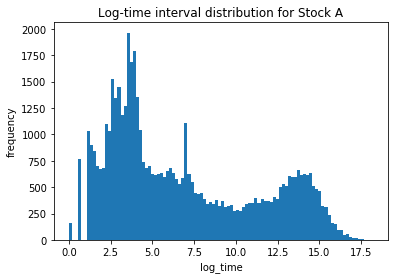

In [674]:
## Firstly we give the hist of the two set of time. The result is as following:
## Note that we take the log value of the intervals to hist.

P1=plt.hist(l_TIA,100)
plt.xlabel('log_time')  
plt.ylabel('frequency')  
plt.title(r'Log-time interval distribution for Stock A')  
plt.show()

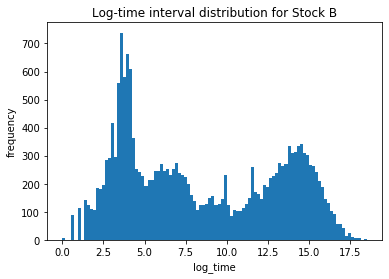

In [675]:
P1=plt.hist(l_TIB,100)
plt.xlabel('log_time')  
plt.ylabel('frequency')  
plt.title(r'Log-time interval distribution for Stock B') 
plt.show()

From the two plots, seems that the time intervals for each stocks approximately form ome certain Gaussian Mixture Distribution. Here we can use EM-Algorithm to calculate the parameters; 

In [47]:
from sklearn.mixture import GaussianMixture 

gmmA=GaussianMixture(n_components=2)
gmmB=GaussianMixture(n_components=2)
gmmA.fit(l_TIA.reshape(-1,1))
gmmB.fit(l_TIA.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [752]:
## Calculating Parameters and save the results
weight_A=np.array([[gmmA.weights_[0],gmmA.weights_[1]]])
mu_A=np.array([[gmmA.means_[0][0],gmmA.means_[1][0]]])
var_A=np.array([[gmmA.covariances_[0][0][0],gmmA.covariances_[1][0][0]]])
weight_B=np.array([[gmmB.weights_[0],gmmB.weights_[1]]])
mu_B=np.array([[gmmB.means_[0][0],gmmA.means_[1][0]]])
var_B=np.array([[gmmB.covariances_[0][0][0],gmmB.covariances_[1][0][0]]])

## Now put the parameters in one datatable:
par_A=np.concatenate((weight_A,mu_A,var_A))
par_B=np.concatenate((weight_B,mu_B,var_B))
par_A.shape=(6,1)
par_B.shape=(6,1)
par_name=np.array([['weight_1'],['weight_2'],['mu_1'],['mu_2'],['sigma_1'],['sigma_2']])
Result=pd.DataFrame(np.hstack((par_name,par_A,par_B)))
Result.columns=['parameter_name','Stock A','Stock B']
Result

parameter_name              Stock A             Stock B
0       weight_1  0.33037262108880977  0.3307184688692969
1       weight_2   0.6696273789112022  0.6692815311306916
2           mu_1   12.409582344221597  12.405056186540019
3           mu_2    4.107702105985726   4.107702105985726
4        sigma_1    5.100062509076796   5.115600805547423
5        sigma_2   3.9911812571283156  3.9844363378609877

That is, let $TL_A$, $TL_B$ be the log time interval that the stock information change, then the distribution of $TL_A$ and $TL_B$ are as following:

$$f_{TL_A}(t)=0.67N(t|4.108,3.99)+0.33N(t|12.409,5.10)$$

$$f_{TL_B}(t)=0.67N(t|4.108,3.99)+0.33N(t|12.405,5.10)$$

The two distributions are approximately the same, which means that the interval of time change does not rely on the type of stocks.

Above all, the predicting procedure for one certain stock (A or B) can be expressed as this: 

(1) First of all, sample $X$ from the Gaussian Mixture Model $0.67N(4.108,3.99)+0.33N(12.409,5.10)$; then calculate the time interval $t=exp(X)$; use this time interval, find the certain time that the stock data changes.

(2) For the `bid` and `ask` responsors, using the models construct in part 1 to predict the new values based on the last three different conditions

(3) For `bidsz` and `asksz`, using the Poisson Regression model construct in part 2 to predict the new values based on the last three different conditions; after prediction, calculate the exponential values and find the nearest integers; the integers are the predicted `bidsz` and `asksz`.

In [41]:
## Part1: Time intervals for trading
TR_A=np.array(trade_A['time'])
TRI_A=list(filter(nonz,[TR_A[i+1]-TR_A[i] for i in range(len(TR_A)-1)]))
l_TRIA=np.log(TRI_A)
TR_B=np.array(trade_B['time'])
TRI_B=list(filter(nonz,[TR_B[i+1]-TR_B[i] for i in range(len(TR_B)-1)]))
l_TRIB=np.log(TRI_B)

array([16.0337785 , 12.9421931 , 12.30700788, ..., 15.71481326,
       15.42108702, 13.74043781])

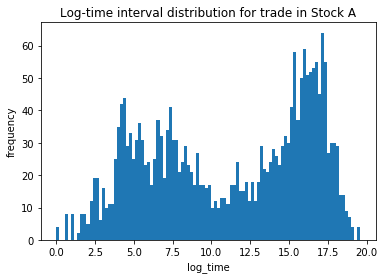

In [44]:
P1=plt.hist(l_TRIA,100)
plt.xlabel('log_time')  
plt.ylabel('frequency')  
plt.title(r'Log-time interval distribution for trade in Stock A')  
plt.show()

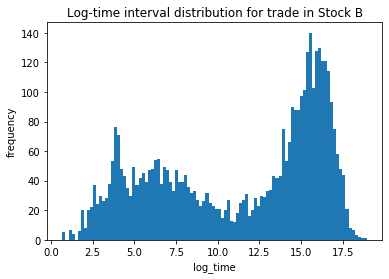

In [45]:
P2=plt.hist(l_TRIB,100)
plt.xlabel('log_time')  
plt.ylabel('frequency')  
plt.title(r'Log-time interval distribution for trade in Stock B')  
plt.show()

In [48]:
T_gmmA=GaussianMixture(n_components=2)
T_gmmB=GaussianMixture(n_components=2)
T_gmmA.fit(l_TRIA.reshape(-1,1))
T_gmmB.fit(l_TRIA.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [49]:
## Calculating Parameters and save the results
Tweight_A=np.array([[T_gmmA.weights_[0],T_gmmA.weights_[1]]])
Tmu_A=np.array([[T_gmmA.means_[0][0],T_gmmA.means_[1][0]]])
Tvar_A=np.array([[T_gmmA.covariances_[0][0][0],T_gmmA.covariances_[1][0][0]]])
Tweight_B=np.array([[T_gmmB.weights_[0],T_gmmB.weights_[1]]])
Tmu_B=np.array([[T_gmmB.means_[0][0],T_gmmA.means_[1][0]]])
Tvar_B=np.array([[T_gmmB.covariances_[0][0][0],T_gmmB.covariances_[1][0][0]]])

## Now put the parameters in one datatable:
T_par_A=np.concatenate((Tweight_A,Tmu_A,Tvar_A))
T_par_B=np.concatenate((Tweight_B,Tmu_B,Tvar_B))
T_par_A.shape=(6,1)
T_par_B.shape=(6,1)
T_par_name=np.array([['weight_1'],['weight_2'],['mu_1'],['mu_2'],['sigma_1'],['sigma_2']])
T_Result=pd.DataFrame(np.hstack((T_par_name,T_par_A,T_par_B)))
T_Result.columns=['parameter_name','Stock A','Stock B']
T_Result

parameter_name             Stock A             Stock B
0       weight_1  0.4993374046931897  0.4993374046931897
1       weight_2  0.5006625953068102  0.5006625953068102
2           mu_1   6.571660559464606   6.571660559464606
3           mu_2  15.695870061221468  15.695870061221468
4        sigma_1   7.318258223970258   7.318258223970258
5        sigma_2  3.1314988002312885  3.1314988002312885

In [ ]:
## Part2: Prediction of trading result
# To begin with, setting the dataset, and stick the previous

In [152]:
FinT_A=pd.concat([ST_A,A1,A2,A3],axis=1)
FinT_B=pd.concat([ST_B,B1,B2,B3],axis=1)
TradeA=trade_A[['time','trdsz','trdsd','trdpx']].reset_index(drop=True)
#TradeA
TR_A=pd.merge(TradeA,FinT_A,how='inner',on='time')
TR_A=TR_A[['time','trdsz','trdsd','trdpx','bid1','bidsz1','ask1','asksz1',
                                          'bid2','bidsz2','ask2','asksz2',
                                          'bid3','bidsz3','ask3','asksz3']]
TR_A['time']=(TR_A['time']-min(TR_A['time']))/pow(10,6)
TR_Aask=TR_A[TR_A['trdsd']==1]
TR_Abid=TR_A[TR_A['trdsd']==-1]

TradeB=trade_B[['time','trdsz','trdsd','trdpx']].reset_index(drop=True)
#TradeB
TR_B=pd.merge(TradeB,FinT_B,how='inner',on='time')
TR_B=TR_B[['time','trdsz','trdsd','trdpx','bid1','bidsz1','ask1','asksz1',
                                          'bid2','bidsz2','ask2','asksz2',
                                          'bid3','bidsz3','ask3','asksz3']]
TR_B['time']=(TR_B['time']-min(TR_B['time']))/pow(10,6)
TR_Bask=TR_B[TR_B['trdsd']==1]
TR_Bbid=TR_B[TR_B['trdsd']==-1]

In [149]:
# First of all, separate all the datasets into training and testing parts, in portion 9:1
train_trAask=TR_Aask[0:int(0.9*len(TR_Aask))]
test_trAask=TR_Aask[int(0.9*len(TR_Aask)):len(TR_Aask)]
train_trAbid=TR_Abid[0:int(0.9*len(TR_Abid))]
test_trAbid=TR_Abid[int(0.9*len(TR_Abid)):len(TR_Abid)]
train_trBask=TR_Bask[0:int(0.9*len(TR_Bask))]
test_trBask=TR_Bask[int(0.9*len(TR_Bask)):len(TR_Bask)]
train_trBbid=TR_Bbid[0:int(0.9*len(TR_Bbid))]
test_trBbid=TR_Bbid[int(0.9*len(TR_Bbid)):len(TR_Bbid)]

l_trtrAask=TR_Abid[0:int(0.9*len(TR_Aask))]
l_trtrAask['trdsz']=np.log(l_trtrAask['trdsz'])
l_trtrAbid=TR_Abid[0:int(0.9*len(TR_Abid))]
l_trtrAbid['trdsz']=np.log(l_trtrAbid['trdsz'])
l_trtrBask=TR_Bbid[0:int(0.9*len(TR_Bask))]
l_trtrBask['trdsz']=np.log(l_trtrBask['trdsz'])
l_trtrBbid=TR_Bbid[0:int(0.9*len(TR_Bbid))]
l_trtrBbid['trdsz']=np.log(l_trtrBbid['trdsz'])

l_trteAask=TR_Abid[int(0.9*len(TR_Abid)):len(TR_Aask)]
l_trteAask['trdsz']=np.log(l_trteAask['trdsz'])
l_trteAbid=TR_Abid[int(0.9*len(TR_Abid)):len(TR_Abid)]
l_trteAbid['trdsz']=np.log(l_trteAbid['trdsz'])
l_trteBask=TR_Bbid[int(0.9*len(TR_Bbid)):len(TR_Bask)]
l_trteBask['trdsz']=np.log(l_trteBask['trdsz'])
l_trteBbid=TR_Bbid[int(0.9*len(TR_Bbid)):len(TR_Bbid)]
l_trteBbid['trdsz']=np.log(l_trteBbid['trdsz'])

In [156]:
# For `trdpx`, here we will only use elastic net method to fit.
### Here we consider the elastic net model, for the model is for prediction, and 
### we have to do some model selection.
### We directly use the ElasticNet method in sklearn.linear_model
Alpha=np.logspace(-5,1,100)
elastic_trA_bid=linear_model.ElasticNet(l1_ratio=0.7)
elastic_trA_ask=linear_model.ElasticNet(l1_ratio=0.7)
elastic_trB_bid=linear_model.ElasticNet(l1_ratio=0.7)
elastic_trB_ask=linear_model.ElasticNet(l1_ratio=0.7)
trA_bid_train_errors=list()
trA_ask_train_errors=list()
trB_bid_train_errors=list()
trB_ask_train_errors=list()

for alpha in Alpha:
    elastic_trA_bid.set_params(alpha=alpha)
    elastic_trA_ask.set_params(alpha=alpha)
    elastic_trB_bid.set_params(alpha=alpha)
    elastic_trB_ask.set_params(alpha=alpha)    
    
    elastic_trA_bid.fit(train_trAbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trAbid['trdpx'])
    elastic_trA_ask.fit(train_trAask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trAask['trdpx'])    
    elastic_trB_bid.fit(train_trBbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trBbid['trdpx'])
    elastic_trB_ask.fit(train_trBask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trBask['trdpx'])        

    trA_bid_train_errors.append(elastic_trA_bid.score(test_trAbid[['time',
                           'bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                           'bid3','bidsz3','ask3','asksz3']],test_trAbid['trdpx']))
    trA_ask_train_errors.append(elastic_trA_bid.score(test_trAask[['time',
                           'bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                           'bid3','bidsz3','ask3','asksz3']],test_trAask['trdpx']))
    trB_bid_train_errors.append(elastic_trB_bid.score(test_trBbid[['time',
                           'bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                           'bid3','bidsz3','ask3','asksz3']],test_trBbid['trdpx']))
    trB_ask_train_errors.append(elastic_trB_bid.score(test_trBask[['time',
                           'bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                           'bid3','bidsz3','ask3','asksz3']],test_trBask['trdpx']))    

In [160]:
### The regression coefficients
elastic_trA_bid.set_params(alpha=Alpha[np.argmax(trA_bid_train_errors)])
coef_trA_bid=elastic_trA_bid.fit(train_trAbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trAbid['trdpx']).coef_
intc_trA_bid=elastic_trA_bid.fit(train_trAbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trAbid['trdpx']).intercept_
trA_bid_test_errors=elastic_trA_bid.score(test_trAbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_trAbid['trdpx'])

elastic_trA_ask.set_params(alpha=Alpha[np.argmax(trA_ask_train_errors)])
coef_trA_ask=elastic_trA_ask.fit(train_trAask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trAask['trdpx']).coef_
intc_trA_ask=elastic_trA_ask.fit(train_trAask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trAask['trdpx']).intercept_
trA_ask_test_errors=elastic_trA_ask.score(test_trAask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_trAask['trdpx'])

elastic_trB_bid.set_params(alpha=Alpha[np.argmax(trB_bid_train_errors)])
coef_trB_bid=elastic_trB_bid.fit(train_trBbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trBbid['trdpx']).coef_
intc_trB_bid=elastic_trB_bid.fit(train_trBbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trBbid['trdpx']).intercept_
trB_bid_test_errors=elastic_trB_bid.score(test_trBbid[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_trBbid['trdpx'])

elastic_trB_ask.set_params(alpha=Alpha[np.argmax(trB_ask_train_errors)])
coef_trB_ask=elastic_trB_ask.fit(train_trBask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trBask['trdpx']).coef_
intc_trB_ask=elastic_trB_ask.fit(train_trBask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],train_trBask['trdpx']).intercept_
trB_ask_test_errors=elastic_trB_ask.score(test_trBask[['time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']],test_trBask['trdpx'])
## The performance upon each responsors
Score=[trA_bid_test_errors,trA_ask_test_errors,trB_bid_test_errors,trB_ask_test_errors]
Score

[0.9947686997736793, 0.9597860457989849, 0.9955058309239992, 0.991589550352823]

Here we output the parameters for each regression model

In [161]:
## For A-bid
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_trA_bid),coef_trA_bid))
DT_trAbid=pd.DataFrame([predictor,Coef])
DT_trAbid

0            1         2       3         4           5         6   \
0  Intercept         time      bid1  bidsz1      ask1      asksz1      bid2   
1    44.3882  6.40475e-06  0.125062      -0  0.413018 -0.00252505  0.162735   

       7         8       9          10           11         12      13  
0  bidsz2      ask2  asksz2       bid3       bidsz3       ask3  asksz3  
1      -0  0.168692      -0  0.0672212 -6.87251e-05  0.0526478      -0

In [162]:
## For A-ask
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_trA_ask),coef_trA_ask))
DT_trAask=pd.DataFrame([predictor,Coef])
DT_trAask

0            1         2           3          4            5   \
0  Intercept         time      bid1      bidsz1       ask1       asksz1   
1    6.64197 -6.88099e-07  0.715462  0.00704736  0.0958751  0.000406771   

         6           7     8       9          10          11    12  \
0      bid2      bidsz2  ask2  asksz2       bid3      bidsz3  ask3   
1  0.130506 -0.00300398     0      -0  0.0565363 -0.00291342     0   

            13  
0       asksz3  
1 -0.000544843

In [163]:
## For B-bid
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_trB_bid),coef_trB_bid))
DT_trBbid=pd.DataFrame([predictor,Coef])
DT_trBbid

0            1          2       3         4       5         6   \
0  Intercept         time       bid1  bidsz1      ask1  asksz1      bid2   
1    72.3535  4.30394e-06  0.0657165      -0  0.418212      -0  0.116181   

       7         8       9           10      11        12      13  
0  bidsz2      ask2  asksz2        bid3  bidsz3      ask3  asksz3  
1      -0  0.254018      -0  0.00212984      -0  0.135816      -0

In [164]:
## For A-bid
predictor=['Intercept','time','bid1','bidsz1','ask1','asksz1',
                           'bid2','bidsz2','ask2','asksz2',
                          'bid3','bidsz3','ask3','asksz3']
Coef=np.hstack((np.array(intc_trB_ask),coef_trB_ask))
DT_trBask=pd.DataFrame([predictor,Coef])
DT_trBask

0            1        2          3          4          5   \
0  Intercept         time     bid1     bidsz1       ask1     asksz1   
1    18.9674  4.75697e-06  1.00749  0.0284058  0.0438867  0.0027109   

          6           7          8           9          10          11  \
0       bid2      bidsz2       ask2      asksz2       bid3      bidsz3   
1  0.0114334 -0.00891906 -0.0375723 -0.00446299 -0.0270264 -0.00769909   

            12          13  
0         ask3      asksz3  
1 -0.000303344  0.00125181